In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma


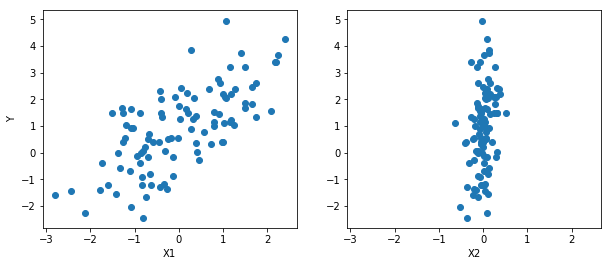

In [3]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [4]:
from pymc3 import Model, Normal, HalfNormal

In [5]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [7]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
{'alpha': array(0.9065985497559482), 'beta': array([ 0.94848602,  2.60705514]), 'sigma_log_': array(-0.032781470174030686)}


In [8]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:
    # draw 2000 posterior samples
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -153.48: 100%|██████████| 200000/200000 [00:19<00:00, 10272.08it/s]
Finished [100%]: Average ELBO = -153.51
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
100%|██████████| 2000/2000 [00:03<00:00, 514.66it/s]


In [9]:
trace['alpha'][-5:]

array([ 1.16974168,  0.75148501,  0.81236789,  1.10810107,  1.10810107])

In [10]:
from pymc3 import Slice

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = Slice(vars=[sigma])

    # draw 5000 posterior samples
    trace = sample(5000, step=step, start=start)

Assigned NUTS to alpha
Assigned NUTS to beta


Optimization terminated successfully.
         Current function value: 149.019762
         Iterations: 4
         Function evaluations: 176


100%|██████████| 5000/5000 [00:08<00:00, 763.22it/s]


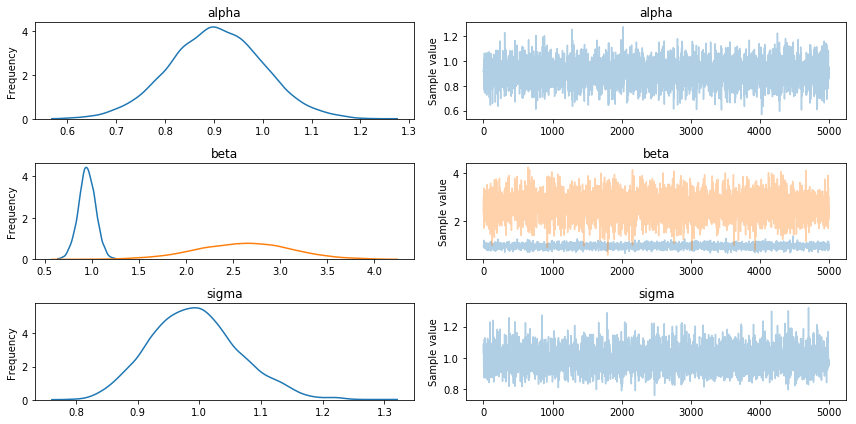

In [11]:
from pymc3 import traceplot

traceplot(trace);

In [12]:

from pymc3 import summary

summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.905            0.095            0.001            [0.712, 1.089]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.716          0.841          0.905          0.970          1.094


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.950            0.091            0.002            [0.773, 1.135]
  2.609            0.504            0.008            [1.631, 3.604]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.766          0.891          0.949          1.011          1.131
  1.603          2.266          2.624   

In [59]:

from pymc3 import summary

pymc3.df_summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.905159,0.095460,0.001408,0.712481,1.089112
beta__0,0.950276,0.090995,0.001584,0.773345,1.134611
beta__1,2.609009,0.503744,0.007503,1.630837,3.603851
sigma,0.992204,0.072072,0.001141,0.860424,1.138127


In [30]:
len(trace)
print(trace[0])
print(trace[4999                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ])


{'alpha': 0.9172036900123266, 'beta': array([ 0.93959183,  2.40616138]), 'sigma': 1.0312288182156928, 'sigma_log_': 0.030751118543751288}
{'alpha': 0.86259703864137327, 'beta': array([ 0.89856929,  2.27776004]), 'sigma': 0.95661140779178822, 'sigma_log_': -0.044358022454979065}


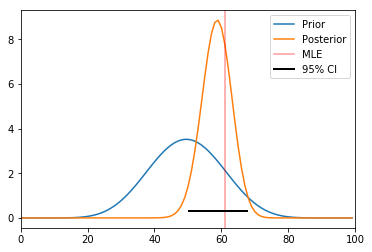

In [14]:
a, b = 10, 10
stats.beta
prior = stats.beta(a, b)
post = stats.beta(heads+a, n-heads+b)
ci = post.interval(0.95)

xs = np.linspace(0, 1, 100)
plt.plot(prior.pdf(xs), label='Prior')
plt.plot(post.pdf(xs), label='Posterior')
plt.axvline(100*heads/n, c='red', alpha=0.4, label='MLE')
plt.xlim([0, 100])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.legend()

In [48]:
import pymc3

import numpy as np
import matplotlib.pyplot as plt
import pymc3 as mc
import theano.tensor as tt

working = mc.Model()

with working:
#     p = mc.Uniform("p",0,1)
    p = mc.Dirichlet('p', np.ones(2))
    assign = mc.Categorical("assign",tt.stack([p,1-p]))

# working = mc.Model()
# with working:
    
# p = pymc3.Dirichlet('p', np.ones(2))
#however, if you are intent on sticking with a scalar uniform, you could do the following:

# import theano.tensor as tt

# working = pymc3.Model()
# with working:
#     p = mc.Uniform("p",0,1)
#     assign = mc.Categorical("assign",tt.stack([p,1-p]))

In [58]:
p.argmin()

argmax

In [35]:
import scipy.io as sio

data = sio.loadmat('learning_tree_structured_models_data/PA8Data.mat')
data['trainData'] = data['trainData'][0][0][0]
data['testData'] = data['testData'][0][0][0]
print (list(data))

['__globals__', '__version__', 'trainData', 'G1', '__header__', 'testData', 'G2']


In [36]:
import pandas as pd
import numpy as np
# reshape input data from [s,b,p] to {b, df(s,p)}
def reshape_data(data):
    # convert from [s][b][p] to [s,b,p]
    retData = np.array(list(map(
        lambda sample: np.array(np.array(sample)),
        data
    )))
    # convert from [s,b,p] to [b,s,p]
    retData = np.swapaxes(retData, 0, 1)
    # convert from [b,s,p] to {b: df(s,p)}
    retData = dict(map(
        lambda part_index: (part_index, pd.DataFrame(retData[part_index,:,:])),
        range(0, retData.shape[0])
    ))
    # give each DF proper column names
    for part in retData: 
        retData[part].columns = ['y', 'x', 'alpha']
    return retData

trainData = reshape_data(data['trainData'])
testData = reshape_data(data['testData'])
print(trainData[0][:5])

           y          x     alpha
0 -26.126503  -9.497464 -2.794429
1  29.071386   5.123299 -2.871538
2 -28.791222 -27.360730 -3.353392
3  28.302354   6.305916 -2.787770
4  12.989795   0.972703 -3.383294
